
# Exports

# Experiments:


- Without density

- With density

- With density + gdpcap

- With density + gdpcap + wto + contig

- With density + pci + gdpcap + wto + contig

- With density + pop 

In [1]:
%load_ext autotime
%matplotlib inline

time: 705 ms (started: 2023-07-07 16:33:10 +03:00)


In [2]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 1.6 s (started: 2023-07-07 16:33:10 +03:00)


In [3]:
data =  pd.read_csv('Data/SimpleApproach/Imports/DataImports2016-2019GravityHSlevelComplexity.csv')
data.dropna(inplace=True)
data

,refYear,partnerCode,reporterCode,distw_harmonic,contig,gdp_d,gdp_o,gdpcap_d,gdpcap_o,pop_d,...,wto_d,wto_o,refMonth,partner2Code,cmdCode,primaryValue,2HScmdCode,4HScmdCode,pci,density
0,2016,4.0,12.0,5758.0,0.0,1.946902e+07,1.560796e+08,0.562,3.844,34656.033,...,1.0,0.0,5.0,0.0,842123.0,163.030,84.0,8421.0,1.908080,0.010296
1,2016,8.0,12.0,1511.0,0.0,1.192689e+07,1.560796e+08,4.147,3.844,2876.101,...,1.0,0.0,8.0,0.0,842123.0,47.290,84.0,8421.0,1.908080,0.010296
2,2016,8.0,12.0,1511.0,0.0,1.192689e+07,1.560796e+08,4.147,3.844,2876.101,...,1.0,0.0,10.0,0.0,842123.0,1941.390,84.0,8421.0,1.908080,0.010296
3,2016,32.0,12.0,10149.0,0.0,5.458662e+08,1.560796e+08,12.449,3.844,43847.431,...,1.0,0.0,1.0,0.0,842123.0,812.090,84.0,8421.0,1.908080,0.010296
4,2016,32.0,12.0,10149.0,0.0,5.458662e+08,1.560796e+08,12.449,3.844,43847.431,...,1.0,0.0,2.0,0.0,842123.0,4504.280,84.0,8421.0,1.908080,0.010296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90844603,2019,458.0,352.0,11271.0,0.0,3.652764e+08,2.485774e+07,11.433,68.941,31949.789,...,1.0,1.0,8.0,0.0,846721.0,3629.278,84.0,8467.0,2.672168,0.034830
90844604,2019,458.0,352.0,11271.0,0.0,3.652764e+08,2.485774e+07,11.433,68.941,31949.789,...,1.0,1.0,10.0,0.0,846721.0,11405.271,84.0,8467.0,2.672168,0.034830
90844605,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,1.0,0.0,846721.0,966.607,84.0,8467.0,2.672168,0.034830
90844606,2019,484.0,352.0,7308.0,0.0,1.269404e+09,2.485774e+07,9.950,68.941,127575.531,...,1.0,1.0,2.0,0.0,846721.0,1010.410,84.0,8467.0,2.672168,0.034830


time: 3min 38s (started: 2023-07-07 16:33:12 +03:00)


In [4]:
def MPE(Y_actual,Y_Predicted):
    mape = np.mean((Y_actual - Y_Predicted)/Y_actual)*100
    return mape

def MAPE(Y_actual,Y_Predicted):
    mpe = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mpe

data['primaryValue'] = data['primaryValue']/1000000
data['gdp_o'] = data['gdp_o']/1000000
data['gdp_d'] = data['gdp_d']/1000000
data['gdpcap_o'] = data['gdpcap_o']/1000000
data['gdpcap_d'] = data['gdpcap_d']/1000000
data['distw_harmonic'] = data['distw_harmonic']/1000

time: 2.33 s (started: 2023-07-07 16:36:50 +03:00)


## RF


In [5]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, oob_score=True,criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (6126878, 6)
X_train.shape:  (77622558, 6)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 10.6min remaining: 22.5min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 11.1min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 11.3min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    2.2s remaining:   25.7s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    2.5s remaining:    1.7s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    3.0s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.4s remaining:  1.6min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.89
R2 on validation data: 0.85
OOB Score (R-squared): 0.85
Mean Squared Error: 22.78
Mean Absolute Error: 0.33
Adjusted R^2 Score: 0.85
MAPE:  195667.89767691496
MPE:  -195651.4732256107
time: 17min 4s (started: 2023-07-07 16:36:52 +03:00)


Feature Importances:
 refYear           0.002
distw_harmonic    0.117
gdp_o             0.216
gdp_d             0.100
refMonth          0.003
cmdCode           0.561
dtype: float64


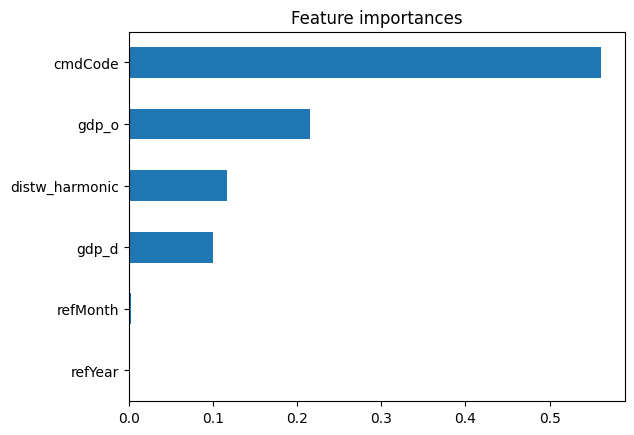

time: 248 ms (started: 2023-07-07 16:53:57 +03:00)


In [6]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

In [7]:
#+density
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

X_val.shape:  (6126878, 7)
X_train.shape:  (77622558, 7)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 12.7min remaining: 26.9min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 13.0min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    2.2s remaining:   25.4s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.8s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    8.0s remaining:  1.5min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.9
R2 on validation data: 0.73
OOB Score (R-squared): 0.86
Mean Squared Error: 39.61
Mean Absolute Error: 0.4
Adjusted R^2 Score: 0.73
MAPE:  223204.26455408533
MPE:  -223188.5116532613
time: 19min 41s (started: 2023-07-07 16:53:57 +03:00)


Feature Importances:
 refYear           0.003
distw_harmonic    0.108
gdp_o             0.193
gdp_d             0.104
refMonth          0.002
cmdCode           0.447
density           0.144
dtype: float64


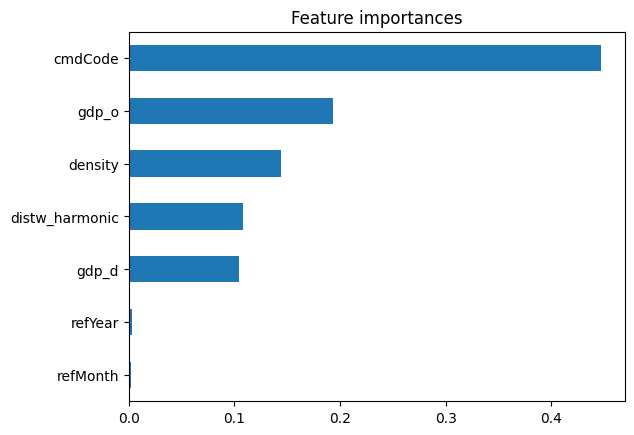

time: 240 ms (started: 2023-07-07 17:13:38 +03:00)


In [8]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 9)
X_train.shape:  (77622558, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 15.2min remaining: 32.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 15.8min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.7min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.1s remaining:   36.1s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    4.3s remaining:    2.8s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    4.8s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:   10.4s remaining:  2.0min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.91
R2 on validation data: 0.75
OOB Score (R-squared): 0.88
Mean Squared Error: 41.61
Mean Absolute Error: 0.37
Adjusted R^2 Score: 0.75
MAPE:  212596.1726380867
MPE:  -212580.11240482028
Feature Importances:
 refYear           0.001
distw_harmonic    0.091
gdp_o             0.165
gdp_d             0.085
refMonth          0.002
cmdCode           0.457
density           0.133
gdpcap_o          0.028
gdpcap_d          0.038
dtype: float64


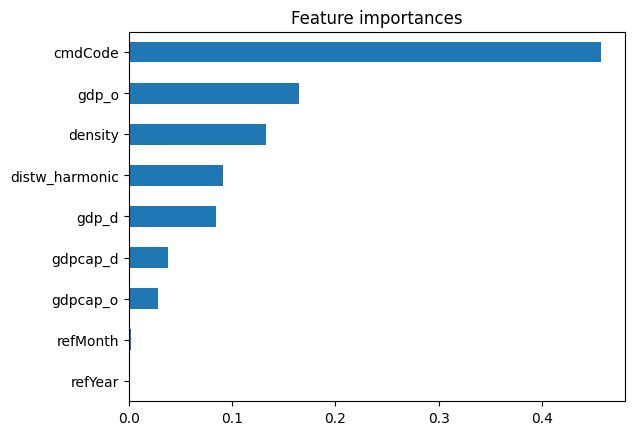

time: 24min 38s (started: 2023-07-07 17:13:38 +03:00)


In [9]:
# +density+gdpcap

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 10)
X_train.shape:  (77622558, 10)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 13.8min remaining: 29.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 14.0min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 14.1min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    3.5s remaining:   40.5s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    4.3s remaining:    2.9s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    4.7s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    9.7s remaining:  1.9min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.91
R2 on validation data: 0.71
OOB Score (R-squared): 0.88
Mean Squared Error: 43.38
Mean Absolute Error: 0.37
Adjusted R^2 Score: 0.71
MAPE:  209251.10543528167
MPE:  -209234.7197362562
Feature Importances:
 refYear           0.001
distw_harmonic    0.082
gdp_o             0.169
gdp_d             0.093
refMonth          0.001
cmdCode           0.350
pci               0.139
density           0.104
gdpcap_o          0.024
gdpcap_d          0.036
dtype: float64


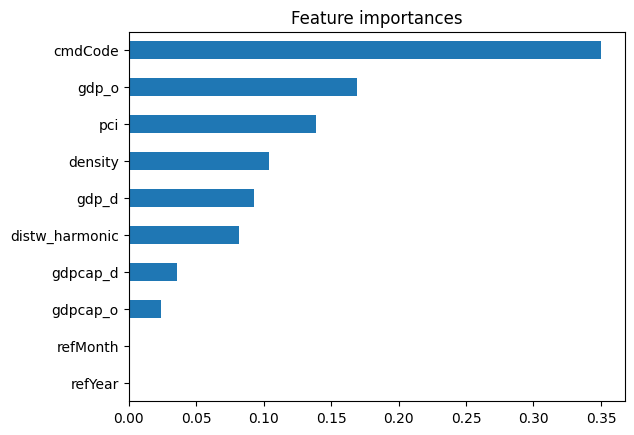

time: 20min 56s (started: 2023-07-07 17:38:17 +03:00)


In [10]:
# +density+gdpcap+pci

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 9)
X_train.shape:  (77622558, 9)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed: 16.4min remaining: 34.8min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 16.9min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    1.4s remaining:   15.8s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    1.9s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.3s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

R2 on training data: 0.91
R2 on validation data: 0.67
OOB Score (R-squared): 0.88
Mean Squared Error: 46.98
Mean Absolute Error: 0.38
Adjusted R^2 Score: 0.67
MAPE:  201700.2317569354
MPE:  -201684.0383740062
Feature Importances:
 distw_harmonic    0.084
gdp_o             0.167
gdp_d             0.091
refMonth          0.001
cmdCode           0.350
pci               0.137
density           0.107
gdpcap_o          0.024
gdpcap_d          0.038
dtype: float64


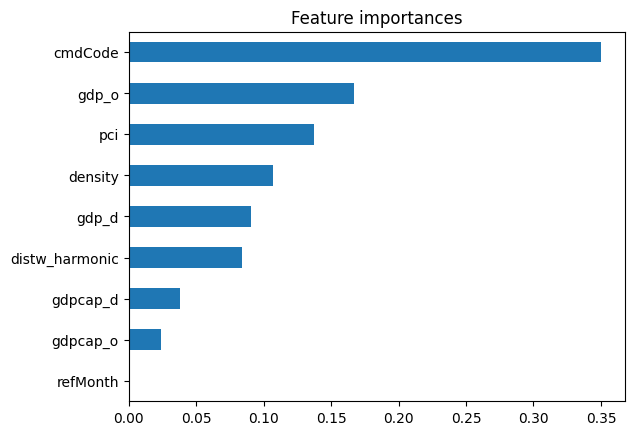

time: 21min 52s (started: 2023-07-07 17:59:14 +03:00)


In [11]:
# +density+gdpcap+pci + No year

X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[[ 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','pci','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

# X = data[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
# y = data['primaryValue']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
# del X, y


# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=2, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

# Log transformations

X_val.shape:  (6126878, 6)
X_train.shape:  (77622558, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.7min remaining: 12.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  6.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.3min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    1.7s remaining:   19.4s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.5s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.36
R2 on training data: 0.16
R2 on validation data: 0.18
MSE:  125.37
MAE:  0.33
R-square:  0.18
MAPE:  11116.7
MPE:  -11042.87
Feature Importances:
 refYear           0.002
distw_harmonic    0.139
gdp_o             0.308
gdp_d             0.211
refMonth          0.001
cmdCode           0.338
dtype: float64


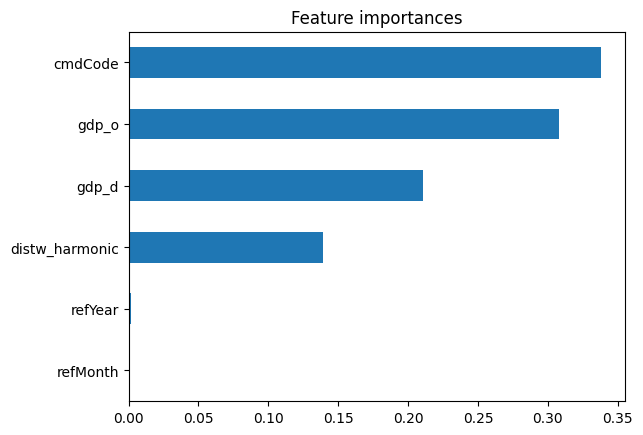

time: 10min 47s (started: 2023-07-07 18:21:06 +03:00)


In [12]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True, min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 6)
X_train.shape:  (77622558, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.7min remaining: 12.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  6.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.2min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    1.7s remaining:   20.1s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    6.1s remaining:  1.2min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.36
R2 on training data: 0.16
R2 on validation data: 0.2
MSE:  110.43
MAE:  0.33
R-square:  0.2
MAPE:  11416.43
MPE:  -11342.61
Feature Importances:
 refYear           0.002
distw_harmonic    0.139
gdp_o             0.308
gdp_d             0.211
refMonth          0.001
cmdCode           0.338
dtype: float64


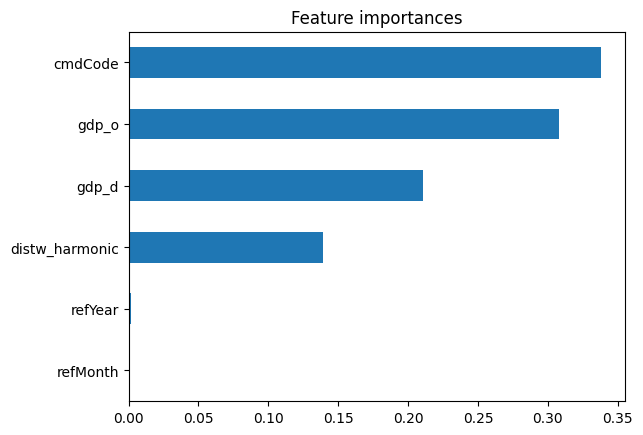

time: 10min 36s (started: 2023-07-07 18:31:54 +03:00)


In [13]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density']]
print("X_train.shape: ", X_train.shape)



X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])


oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

X_val.shape:  (6126878, 6)
X_train.shape:  (77622558, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25building tree 2 of 25
building tree 3 of 25

building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.8min remaining: 12.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  6.6min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.8min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    1.7s remaining:   19.3s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.8s remaining:  1.5min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.36
R2 on training data: 0.16
R2 on validation data: 0.2
MSE:  123.09
MAE:  0.33
R-square:  0.2
MAPE:  11140.56
MPE:  -11066.78
Feature Importances:
 refYear           0.002
distw_harmonic    0.139
gdp_o             0.308
gdp_d             0.211
refMonth          0.001
cmdCode           0.338
dtype: float64


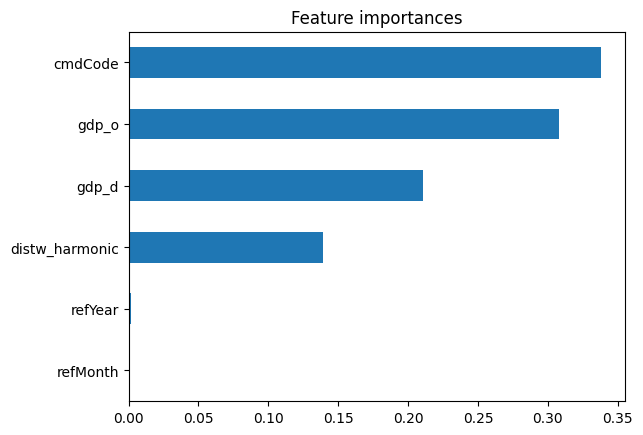

time: 11min 14s (started: 2023-07-07 18:42:30 +03:00)


In [14]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
# X_train = X_train[X_train['year'] != 2016] # just testing!
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d']]
print("X_train.shape: ", X_train.shape)

X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()


X_val.shape:  (6126878, 6)
X_train.shape:  (77622558, 6)


/export/home/chouno/python-installation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.8min remaining: 12.3min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  6.7min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.7min finished
/export/home/chouno/python-installation/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    1.7s remaining:   19.8s
[Parallel(n_jobs=25)]: Done  15 out of  25 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=25)]: Done  25 out of  25 | elapsed:    2.2s finished
[Parallel(n_jobs=25)]: Using backend ThreadingBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   2 out of  25 | elapsed:    7.5s remaining:  1.4min
[Parallel(n_jobs=25)]: Done  15 out of  25 | el

OOB Score (R-squared): 0.36
R2 on training data: 0.16
R2 on validation data: 0.21
MSE:  114.6
MAE:  0.33
R-square:  0.21
MAPE:  10770.01
MPE:  -10696.16
Feature Importances:
 refYear           0.002
distw_harmonic    0.139
gdp_o             0.308
gdp_d             0.211
refMonth          0.001
cmdCode           0.338
dtype: float64


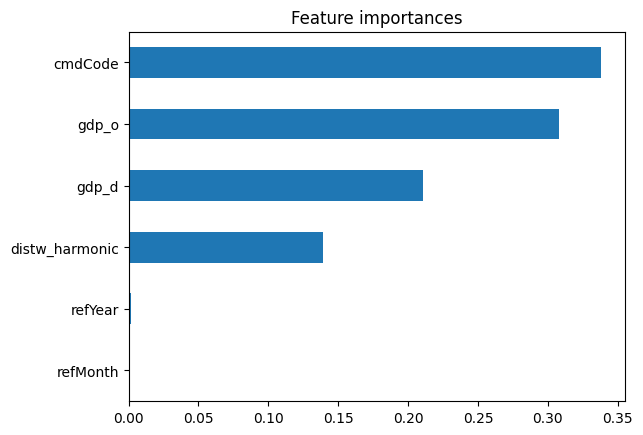

time: 11min 9s (started: 2023-07-07 18:53:44 +03:00)


In [15]:
X_test = data[data['refYear'] == 2019].sample(frac =.5)
y_test = X_test['primaryValue']
X_test = X_test[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_val.shape: ", X_test.shape)

X_train = data[data['refYear'] != 2019]
y_train = X_train['primaryValue']
X_train = X_train[['refYear', 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode','density','gdpcap_o','gdpcap_d','pci']]
print("X_train.shape: ", X_train.shape)


X_train_log = X_train.copy()
y_train_log = np.log(y_train)
X_test_log = X_test.copy()
y_test_log = y_test

X_train_log['gdp_o'] = np.log(X_train_log['gdp_o'])
X_train_log['gdp_d'] = np.log(X_train_log['gdp_d'])
X_train_log['distw_harmonic'] = np.log(X_train_log['distw_harmonic'])

X_test_log['gdp_o'] = np.log(X_test_log['gdp_o'])
X_test_log['gdp_d'] = np.log(X_test_log['gdp_d'])
X_test_log['distw_harmonic'] = np.log(X_test_log['distw_harmonic'])

indices = y_train_log[y_train_log ==-np.inf].index
X_train_log = X_train_log.drop(indices)
y_train_log = y_train_log[y_train_log !=-np.inf]

# RF
reg = model = RandomForestRegressor(oob_score=True,min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, max_depth=17, verbose=2)
reg = reg.fit(X_train_log, y_train_log)
y_pred = reg.predict(X_test_log)
y_pred_train = reg.predict(X_train_log)
y_pred = np.exp(y_pred)
y_pred_train = np.exp(y_pred_train)
y_train_log = np.exp(y_train_log)


mse = mean_squared_error(y_test_log,y_pred)
mae = mean_absolute_error(y_test_log,y_pred)
r2 = r2_score(y_test_log, y_pred)
r2_train = r2_score(y_train_log, y_pred_train)

index = y_test_log!=0
mape = MAPE(y_test_log[index], y_pred[index])
mpe = MPE(y_test_log[index], y_pred[index])

oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2.round(2))

print('MSE: ', mse.round(2))
print('MAE: ', mae.round(2))
print('R-square: ', r2.round(2))
print('MAPE: ', mape.round(2))
print('MPE: ', mpe.round(2))
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()